c:\ProgramData\anaconda3\envs\MolGT\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


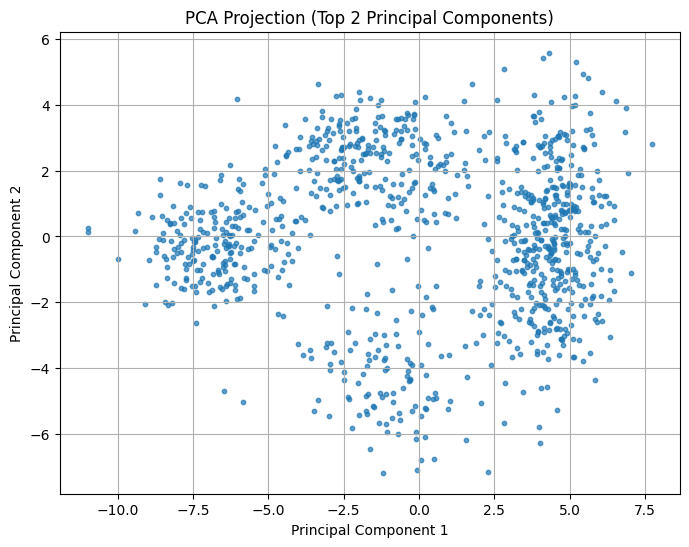

C:\Users\xbcnu\AppData\Roaming\Python\Python311\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


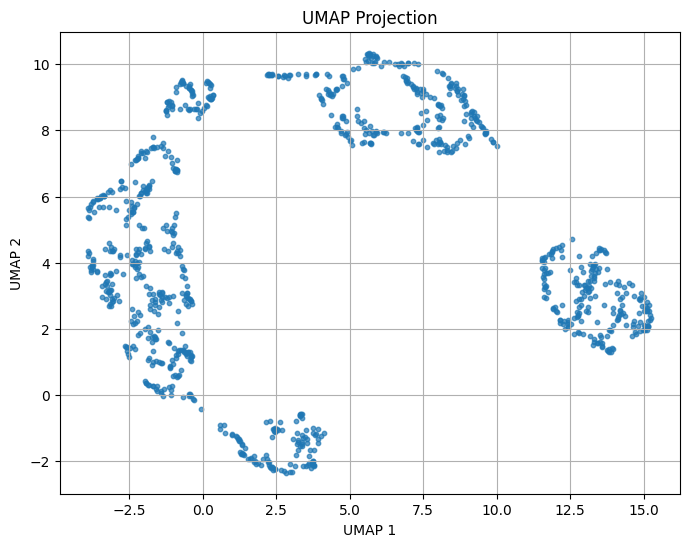

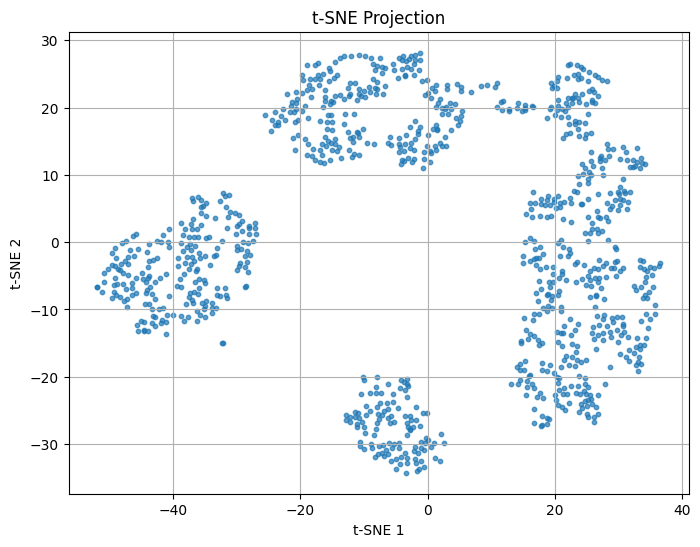

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import umap

data = np.loadtxt("pca_data.txt")

#& centering the data
data_mean = np.mean(data, axis=0)
data_centered = data - data_mean

#& covariance matrix calculation
cov_matrix = np.cov(data_centered, rowvar=False)

#& eigendecomposition 
eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

#& eigenvalues and eigenvectors decomposition
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]
top_2_eigenvectors = eigenvectors[:, :2]
projected_data = np.dot(data_centered, top_2_eigenvectors)

#& Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(projected_data[:, 0], projected_data[:, 1], s=10, alpha=0.7)
plt.title("PCA Projection (Top 2 Principal Components)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.grid(True)
plt.show()

#& UMAP plot
umap_reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_embedding = umap_reducer.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(umap_embedding[:, 0], umap_embedding[:, 1], s=10, alpha=0.7)
plt.title("UMAP Projection")
plt.xlabel("UMAP 1")
plt.ylabel("UMAP 2")
plt.grid(True)
plt.show()

#& t-SNE plot
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
tsne_embedding = tsne.fit_transform(data)

plt.figure(figsize=(8, 6))
plt.scatter(tsne_embedding[:, 0], tsne_embedding[:, 1], s=10, alpha=0.7)
plt.title("t-SNE Projection")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.grid(True)
plt.show()


In [ ]:
import numpy as np
from scipy.special import factorial

data = np.loadtxt("em_data.txt")
data = np.round(data).astype(int)

np.random.seed(42)
lambda1 = np.random.uniform(1, 3)  # Initial mean for families with family planning
lambda2 = np.random.uniform(3, 6)  # Initial mean for families without family planning
pi = 0.5  # Initial proportion of families with family planning

tolerance = 1e-6
max_iter = 1000
prev_log_likelihood = -np.inf

#& EM Algorithm
for iteration in range(max_iter):
    #& E-step: Compute the responsibilities
    p1 = pi * (lambda1**data * np.exp(-lambda1)) / factorial(data)  # Probability for family planning
    p2 = (1 - pi) * (lambda2**data * np.exp(-lambda2)) / factorial(data)  # Probability without family planning
    responsibilities = p1 / (p1 + p2)

    #& M-step: Update parameters
    pi = np.mean(responsibilities)
    lambda1 = np.sum(responsibilities * data) / np.sum(responsibilities)
    lambda2 = np.sum((1 - responsibilities) * data) / np.sum(1 - responsibilities)

    #& log-likelihood
    log_likelihood = np.sum(np.log(pi * (lambda1**data * np.exp(-lambda1)) +
                                    (1 - pi) * (lambda2**data * np.exp(-lambda2))))

    #& convergence check
    if abs(log_likelihood - prev_log_likelihood) < tolerance:
        break
    prev_log_likelihood = log_likelihood

#result
print("Estimated Parameters:")
print(f"Mean number of children (with family planning): {lambda1:.4f}")
print(f"Mean number of children (without family planning): {lambda2:.4f}")
print(f"Proportion of families with family planning: {pi:.4f}")
print(f"Proportion of families without family planning: {1 - pi:.4f}")


Estimated Parameters:
Mean number of children (with family planning): 1.7831
Mean number of children (without family planning): 4.9113
Proportion of families with family planning: 0.3562
Proportion of families without family planning: 0.6438
